# Exercise 5 - Solution: Implementations of Butterworth Filter

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs)</strong><br>
    
After completing this Jupyter Notebook you should be able to:
    
<ul>
<li> Create and visualise second order Butterworth low-pass and high-pass filters with same parameters.
</li>
    <br>
    
<li> Observe filter transfer function, z-plane, and phase response for changes in the filter order.
</li>
    <br>
    
<li> Understanding the difference between Bandpass and Bandstop Butterworth filters created with the same parameters as filter order increases.
</li>
   <br>
    
<li>understand basic use of functions from the <code>Python</code> libraries
<ul>
<li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html"><code>title()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>,
etc.)
</li>
<li><a href="https://numpy.org/"><code>Numpy</code></a> for mathematical functions and calculations like
<a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html"><code>log10()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>linspace()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>, etc.
</li>
<li>Mostly used library for signal processing
<a href="https://docs.scipy.org/doc/scipy/reference/signal.html"><code>SciPy</code></a>
</li>
</ul>
</li>
   

</ul>
</div>

In the Exercise 5, the tasks of the Butterworth filter are solved. Low-pass, High-pass, Bandpass and Bandstop implementations of the Butterworth filter are shown respectively. Before we start with filters, let's talk about the libraries and their functions used in the Exercise 5.


## Libraries used in the Exercise 5

### Scipy

At the beginning, it's required to import relevant libraries into the code part. SciPy is mostly used library for signal processing since it has wide range of functions and implementations. That's why we initially <code>import scipy.signal as sig</code>. There are only two functions of SciPy to be used in this exercise:
<ol>
    <li><code>sig.butter(order, Wn, btype = '')</code>: First parameter $order$ specifies filter order. It needs to be in a integer type. $W_n$ is the critical frequency or frequencies (cut-off frequency). If we want to design low-pass or high-pass, it must be scalar. For example; $Wn = [0.4]$. If we want to design bandpass or bandstop, $W_n$ must have 2 frequencies. For example; $W_n = [0.4, 0.7]$. You'll see the implementations of them respectively.</li>
    <li><code>sig.freqz(b, a)</code>: It computes frequency response of the filter. The two values b, a from <code>b, a = sig.butter()</code> are used inside this function.</li>
</ol>

### Matplotlib.pyplot

Matplotlib is a good library to visualise our codes. It enables us to make lots of changes on the figures. It's going to be used <code>as plt</code>. In this exercise, mostly used attributes of the plt are <code>plt.figure()</code>, <code>plt.subplot()</code>, <code>plt.plot()</code>, <code>plt.title('')</code>, <code>plt.xlabel('')</code>, <code>plt.ylabel('')</code>, <code>plt.axis()</code> and <code>plt.grid()</code>

<ol>
    <li><code>plt.figure()</code>: It helps us create the figure with setting a size with the parameter <code>figsize = (x,y)</code>. In this exercise, the size of the figure are set to $x = 15$, $y = 4$ </li>
    <li><code>plt.subplot()</code>: It helps us to divide the size we set in figsize into how many parts. If we divide x-axis into two parts, for first graph it's shown as: <code>plt.subplot(1,2,1)</code>, for second graph it'shown as: <code>plt.subplot(1,2,2)</code>. So that, we can show two graphs fitted to the figsize. At the some parts of the Exercise 5  it will be divided by three. Therefore, <code>plt.subplot(1,3,1)</code>,  <code>plt.subplot(1,3,2)</code>,  <code>plt.subplot(1,3,3)</code> will be used.</li>  
    <li><code>plt.plot()</code>: The values to be plotted are specified inside the function. For example;<code>plt.plot(A, response, label='filter transfer function')</code>. Here, There are three parameters that are A, response and label. As you'll see the the values of the parameters below, the filter transfer function is plotted in $dB$.</li>
    <li><code>plt.title('')</code>: As a string type, Title, is determined and written at the top the graph. For example; <code>plt.title('Phase Response')</code></li>
    <li><code>plt.xlabel('')</code>: This function puts a label into the x-axis. For example; <code>plt.xlabel('$\Omega/\pi$')</code></li>
    <li><code>plt.ylabel('')</code>: This function puts a label into the y-axis. For example; <code>plt.ylabel("$|H(exp(j*\Omega))/H(1)|$ in dB")</code></li>
    <li><code>plt.axis()</code>: It provides us to set the limit of the x and y axis all together. For example; <code>plt.axis([0, 1, -50, 2])</code>. Here, x-axis ranges from $0$ to $1$ while y axis ranges from $-50$ to $2$.</li>
    <li><code>plt.grid()</code>: It shows the lines in a grid form. It has few parameters but we'll not use them. </li>
</ol>

### Numpy

Numpy is the last library that needs to be used in the Exercise 5. It's going to be imported <code>as np</code>. Then, we'll use it for math and calculations. In this exercise, some implementations of it is:

<ol>
    <li><code>np.abs()</code>: Absolute value is computed in this function. It's the short form of the <code>np.absolute()</code></li>
    <li><code>np.pi</code>: Pi number is shown in this numpy form. </li>
    <li><code>np.real()</code>: Real part of the complex number is taken. When z-plane is shown, we'll take real part of the zeros and poles</li>
    <li><code>np.imag()</code>: Imaginary part of the complex number is taken. When z-plane is shown, we'll take imaginary part of the zeros and poles.</li>
    <li><code>np.roots()</code>: The roots of the polynomial functions is taken. For example; computed from the <code>sig.butter()</code> function, b and a, are polynomial functions with coefficients. In order to plot z-plane of Butterworth filter, roots should be computed and then sent to the zero-pole plane function.</li>
    <li><code>np.angle()</code>: It returns the angle of the sequential complex numbers.</li>
    <li><code>np.unwrap()</code>: In this exercise, it will be used as <code>np.unwrap(np.angle(h))</code>. It means that angles computed from the <code>np.angle(h)</code> will be converted to the angle in radians in <code>np.unwrap(np.angle(h))</code>. You can think like angles will be unwrapped as angle in radian.</li>
    <li><code>np.linspace()</code>: In this exercise, it will be in the form of <code>np.linspace(0, 1, len(w))</code>. It means that $0$ = starting point, $1$ = ending point and <code>len(w)</code> = The interval between 0 and 1 will be evenly divided by length of $w$.</li>
    <li><code>np.log10()</code>: It returns base 10 logarithm. </li>
    
</ol>

In [1]:
import scipy.signal as sig                     #signal processing library        
import matplotlib.pyplot as plt                #plotting         
import numpy as np                             #numpy library for math

We firstly create our zero-pole plane function to be used in the tasks of the Exercise 5. Zeros are indicated as blue colour with symbol $o$ while poles are shown as red color with symbol $x$. Coming from the transfer function which are b and a sent to the zplane function as <code>np.roots(b)</code> and <code>np.roots(a)</code> respectively. It will be taken as $z$ and $p$. Then, real and imaginary parts of both z and p are calculated. Unit circle (radius = 1) is created and then shown in the figure below.  

In [2]:
#Zero-pole plane function

def zplane(z, p, title='Poles and Zeros'):                          #zplane(np.roots(b), np.roots(a)) are taken as z and p.
    "Plots zeros and poles in the complex z-plane"
    ax = plt.gca()                                                  #'get current axis' => gca()

    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms=10)  #zeros on the plane
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms=10)  #poles on the plane
    unit_circle = plt.Circle((0, 0), radius=1, fill=False,          #creating unit circle r = 1
                             color='black', ls='--', alpha=0.9)
    ax.add_patch(unit_circle)                                       #a 'Patch' is added to the axes.

    plt.title(title)                                                #put title of the figure
    plt.xlabel("Re\{Z\}")                                           #latex version of 'Re{Z}'. $ doesn't work here.
    plt.ylabel("Im\{Z\}")                                           #latex version of 'Im{Z}'. $ doesn't work here.
    plt.axis('equal')



<div class="alert alert-block alert-info">
    <strong><h3> Task 1</h3></strong> <br>
    
Create a Butterworth low-pass filter and high-pass filter that have:
    <ul>
        <li>cut-off frequency $W_n = [0.4]$</li>
        <li>filter order $m = 2$ </li>
        <li>set the axis $x = [0,  1]$ and $y = [-50,  2]$ </li>   
   </ul> 
a) Plot the frequency response and z-plane for <strong>Butterworth low-pass filter</strong> for the specified parameters above. <br>
b) Plot the phase response for <strong>Butterworth low-pass filter</strong> for the specified parameters above.<br>
c) Plot the frequency response and z-plane for <strong>Butterworth high-pass filter</strong> for the specified parameters above. <br> 
d) Plot the phase response for <strong>Butterworth high-pass filter</strong> for the specified parameters above.<br>
</div>


Butterworth filter frequency domain is defined as:

\begin{equation}\label{butter_freq}\tag{5.1}
    |H_n \left(j\omega\right)| \overset{\Delta}{=} \frac{1}{\sqrt{1 + \omega ^ {2n}}} 
\end{equation}

where w is the angular frequency and n is the count of poles.

In Infinite Impulse Response (IIR) filters, s-domain can be employed to express the response of the filter. For this, $s = jw$ transformation is done. The resulting Butterworth polynomials are expressed with different equations according to the even and odd filter order.

For odd order $M$  : 

\begin{equation}\label{odd_order_butterworth}\tag{5.2}
    T(s) = \left(\frac{\omega_n}{s + \omega_n}\right) \prod_{i=1}^{(M-1)/2} \left(\frac{{\omega_n}^2}{s^{2} + 2\mathrm{cos}(\theta_i) \omega_n(s) + \omega_n^{2}}\right),   \theta_i = i \mathrm{x} 180 / N
\end{equation}


For even order $M$ :

\begin{equation}\label{even_order_butterworth}\tag{5.3}
    T(s) = \prod_{i=1}^{M/2} \left(\frac{{\omega_n}^2}{s^{2} + 2\mathrm{cos}(\theta_i) \omega_n(s) + \omega_n^{2}}\right),   \theta_i = (i - 0.5) x  180 / N
\end{equation}




There are some topologies used for the design of the analogue filters. In the <strong>Cauer topology</strong>, capacitors and inductors are used to design analog filter. Butterworth filters can be shown in the Cauer topology as below: 


<br>
<center><span style="font-size:smaller">
Picture taken from <a href="https://en.wikipedia.org/wiki/Butterworth_filter#/media/File:Cauer_lowpass.svg">Wikipedia</a>, plotted by <a href="https://commons.wikimedia.org/wiki/User:Alejo2083">Alessio Damato</a>, license: <a href="https://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>
</span></center>


### Low-Pass Second order Butterworth Filter

Butterworth filter is also referred to as maximally flat filter. It's one of the most common filters used in the IIR filters. Passband in the Butterworth has almost no ripples. So, distortions are tried to minimised in the Butterworth filter. As you remember, low-pass filter lets signal pass lower than normalised cutoff frequency $W_n$. So, you'll see the frequencies that are lower than $0.4$ will pass while frequencies that are higher than $0.4$ are restricted. You can increase the filter order to observe the behaviour of the frequency domain of the Butterworth filter.   

We're asked to design Butterworth low-pass filter with cutoff $W_n = 0.4$ and filter order = $2$. Codes are written to plot frequency response and the zero-pole plane for <strong>Task 1.a:</strong> 

<div class = "alert alert-block alert-warning">
Left figure shows the frequency amplitude graph of the second order Butterworth low-pass filter. Right figure visualises zero-pole plane. As you can see, there are two poles and two zeros on the circle. Poles are symmetric with respect to $y = 0$ line 
</div><br>
<strong>Task 1.b:</strong> Let's code the phase response below and then plot it.


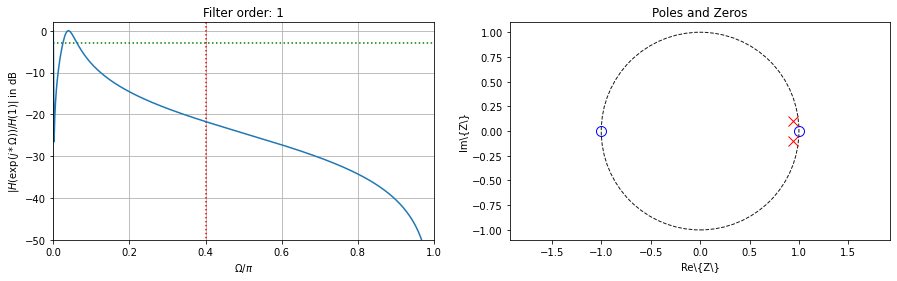

In [10]:
Wn = [0.4,1]                                              #cut-off frequency limits Wn = [x], Wn must be scalar.

order = 1                                               #filter order is set to the 2
b, a = sig.butter(order, Wn, btype= 'bandpass', fs = 32)                 #second-order lowpass butterworth design
w1, h1 = sig.freqz(b, a)                                #compute frequency response
A = np.linspace(0.0, 1.0, len(w1))                      #frequency is normalised to [0.0, 1.0] in a continuous form

plt.figure(figsize=(15,4))                              #set the size of the figure
plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
x = np.abs(h1)
plt.plot([Wn[0],Wn[0]],[-100,2],color='r',ls=':',label='cutoff frequency1') #red dashed line at the cut-off Wn = 0.4
plt.axhline(-3, color='g',ls=':',label='cutoff frequency2')
response = 20 * np.log10(x, out = x, where = x > 0 )    #amplitude in Db is calculated(Zero collision error is avoided)
plt.plot(A, response, label='filter transfer function') #plot frequency response
plt.axis([0, 1, -50, 2])                                #specified axis is set
    
plt.title("Filter order: " + str(order))                #filter order in the title  
plt.xlabel('$\Omega/\pi$')                              #Omega/pi    
plt.ylabel("$|H(\mathrm{exp}(j*\Omega))/H(1)|$ in dB")  #absolute value of the spectrum in dB
plt.grid()                                              #configure the grid lines
    
plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
zplane(np.roots(b), np.roots(a))                        #roots of the polynomial function which is b,a are sent to zplane()



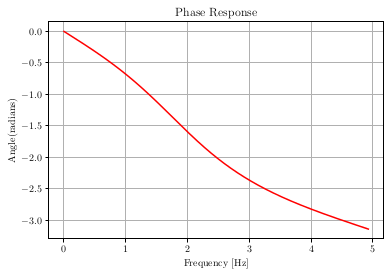

In [100]:
angles = np.unwrap(np.angle(h1))    #angles are taken
plt.plot(w1/2*np.pi, angles, 'r')   #angles are plotted in radians
plt.title('Phase Response')         #put title of the figure
plt.ylabel('Angle(radians)')        #put name of y label
plt.xlabel('Frequency [Hz]')        #put name of x label
plt.grid()                          #configure the grid lines

Phase response of the second order Butterworth low-pass filter is plotted above. Angles are shown as radians. 

### High-Pass Second order Butterworth Filter

High-pass filter lets signal pass higher than normalised cutoff frequency $W_n$. So, you'll see the frequencies that are higher than $0.4$ will pass while frequencies that are lower than $0.4$ are restricted. You can increase the filter order to observe the behaviour of the frequency domain of the Butterworth filter.

We're asked to design Butterworth high-pass filter with cutoff $W_n = 0.4$ and filter order = $2$. Codes are written to plot frequency response and the zero-pole plane for <strong>Task 1.c:</strong> 

Plots are saved as files instead of plotted.


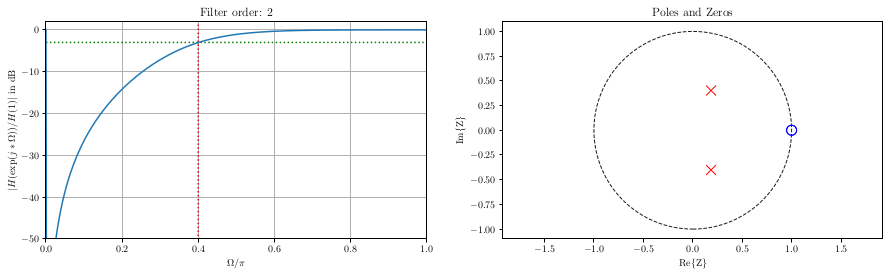

In [101]:
Wn = [0.4]                                    #cut-off frequency limits Wn = [x], Wn must be scalar.
order = 2                                     #filter order is set to the 2
b, a = sig.butter(order, Wn, 'highpass')      #second-order highpass butterworth design
w2, h2 = sig.freqz(b, a)                      #compute frequency response
A = np.linspace(0.0, 1.0, len(w2))            #frequency is normalised to [0.0, 1.0] in a continuous form

plt.figure(figsize=(15,4))                    #set the size of the figure
plt.subplot(1,2,1)                            #1st plot of the 2 plots. (It's gonna be visualised on the left)
x = np.abs(h2)
plt.plot([Wn[0],Wn[0]],[-100,2],color='r',ls=':',label='cutoff frequency') #red dashed line at the cut-off Wn = 0.4
plt.axhline(-3, color='g',ls=':',label='cutoff frequency2')
response = 20 * np.log10(x, out = x, where = x > 0 )    #amplitude in Db is calculated(Zero collision error is avoided)
plt.plot(A, response, label='filter transfer function') #plot frequency response
plt.axis([0, 1, -50, 2])                                #specified axeses is set
    
plt.title("Filter order: " + str(order))               #filter order in the title  
plt.xlabel('$\Omega/\pi$')                             #Omega/pi    
plt.ylabel("$|H(\mathrm{exp}(j*\Omega))/H(1)|$ in dB") #absolute value of the spectrum in dB
plt.grid()                                             #configure the grid lines
    
plt.subplot(1,2,2)                            #2nd plot of the 2 plots. (It's gonna be visualised on the right)
zplane(np.roots(b), np.roots(a))              #roots of the polynomial function which is b,a are sent to zplane() 


<div class = "alert alert-block alert-warning">
Figure on the left shows the frequency response of the Butterworth high-pass filter with order $m = 2$. You can observe the response of the filter by increasing filter order $m$. Just change the filter order and see the difference. The figure on the right illustrates the zero-pole plane. It can be seen from the figure that z-plane has two zeros and two poles. While the location of the poles are same as the low-pass z-plane, the location of the zeros are displaced clockwise in $\pi$ radian. Again, poles are symmetric with respect to $y = 0$ line
<div>

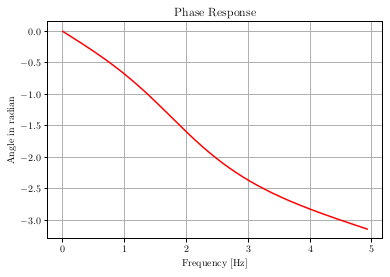

In [102]:
angles = np.unwrap(np.angle(h1))     #angles are taken
plt.plot(w1/2*np.pi, angles, 'r')    #angles are plotted in radians
plt.title('Phase Response')          #put the title of the figure
plt.ylabel('Angle in radian')        #put name of y label
plt.xlabel('Frequency [Hz]')         #put name of x label 
plt.grid()                           #configure the grid lines

It shows the phase angles in radians that change depending on the frequency.

<div class="alert alert-block alert-info">
    <strong><h3> Task 2</h3></strong> <br>
    
Create a Butterworth bandpass filter and bandstop filter that have:
    <ul>
        <li>cut-off frequency limits $W_n = [0.25, 0.4]$</li>
        <li>filter order $m$ ranges from $1$ to $4$ </li>
        <li>set the axis $x = [0,  1]$ and $y = [-70,  2]$ </li>   
   </ul> 
a) Plot the frequency response, z-plane and phase response for <strong>Butterworth bandpass filter</strong> for the specified parameters above. <br>
b) Plot the frequency response, z-plane and phase response for <strong>Butterworth bandstop filter</strong> for the specified parameters above. <br>
</div>

### Butterworth Bandpass Filter

Unlike Low-Pass and High-Pass, cutoff frequency $W_n$ takes two different values in Bandpass and Bandstop filters. In this task, the cutoff frequency limits of the Butterworth Bandpass filter were determined as $0.25$ and $0.4$. The filter order $m = 1$ to $m = 4$ is written in the for loop and the filter transfer function, zero-pole plane, phase response of each filter are shown in this loop. 

Axeses are set to $[0, 1, -70, 2]$ to observe the filter transfer function better. Otherwise, it can be difficult to show the differences between them.


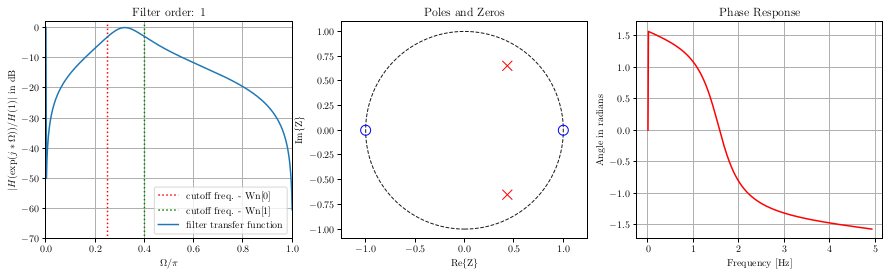

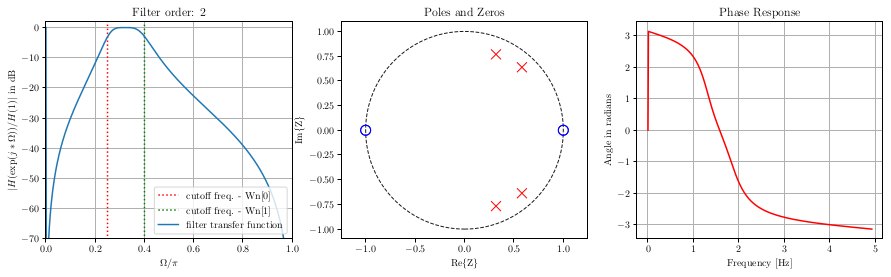

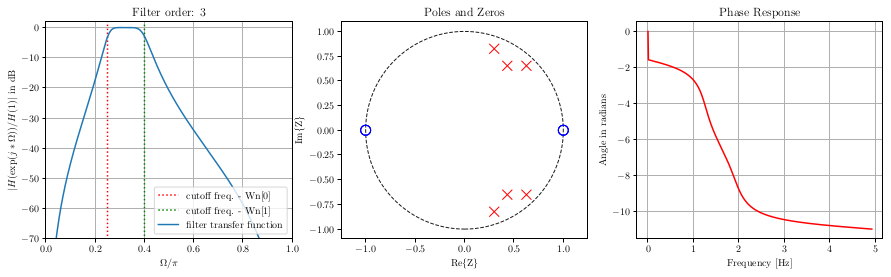

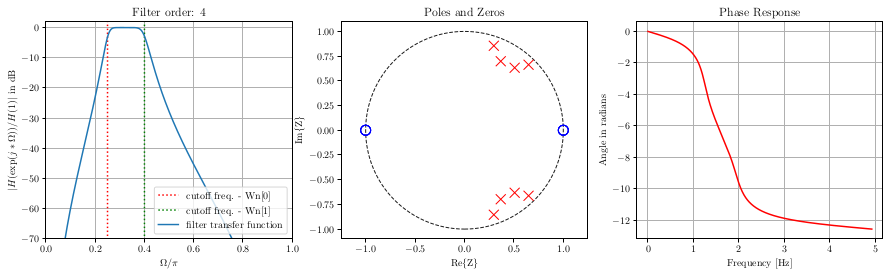

In [111]:
Wn = [0.25, 0.4]                                  #cut-off frequency limits Wn = [low cut-off, high cut-off]

for order in range(1,5):                          #order = 1,2,3 and 4 in a 'for' loop.    
                              
    b, a = sig.butter(order, Wn, 'bandpass')      #bandpass butterworth design
    w3, h3 = sig.freqz(b, a, 512)                 #compute frequency response
    A = np.linspace(0.0, 1.0, len(w3))            #frequency is normalised to [0.0, 1.0] in a continuous form

    plt.figure(figsize=(15,4))                    #set the size of the figure
    
    plt.subplot(1,3,1)                            #1st plot of the 3 plots. (It's gonna be visualised on the left)
    x = np.abs(h3)
    plt.plot([Wn[0],Wn[0]],[-100,2],color='r',ls=':',label='cutoff freq. - Wn[0]') #red dashed line at the cut-off Wn = 0.25 
    plt.plot([Wn[1],Wn[1]],[-100,2],color='g',ls=':',label='cutoff freq. - Wn[1]') #green dashed line at the cut-off Wn = 0.4
    response = 20 * np.log10(x, out = x, where = x > 0 )    #amplitude in Db is calculated(Zero collision error is avoided)
    plt.plot(A, response, label='filter transfer function') #plot frequency response
    plt.axis([0, 1, -70, 2])                                #specified axeses is set
    
    plt.legend(loc='lower right')                 #elements of the graph are shown in the location 'lower right'
    
    plt.title("Filter order: " + str(order))      #filter order in the title  
    plt.xlabel('$\Omega/\pi$')                    #Omega/pi    
    plt.ylabel("$|H(\mathrm{exp}(j*\Omega))/H(1)|$ in dB") #absolute value of the spectrum in dB
    plt.grid()                                    #configure the grid lines
    
    plt.subplot(1,3,2)                            #2nd plot of the 3 plots. (It's gonna be visualised on the middle)
    zplane(np.roots(b), np.roots(a))              #roots of the polynomial function which is b,a are sent to zplane() 
    
    plt.subplot(1,3,3)                            #3rd plot of the 3 plots. (It's gonna be visualised on the right)
    angles = np.unwrap(np.angle(h3))              #angles are taken  
    plt.plot(w3/2*np.pi, angles, 'r')             #angles are plotted in radians
    plt.title('Phase Response')                   #put the title of figure 
    plt.ylabel('Angle in radians')                #put name of y label 
    plt.xlabel('Frequency [Hz]')                  #put name of x label  
    plt.grid()                                    #configure the grid lines

<div class = "alert alert-block alert-warning">
<ol>
    <li> As you can see figures of the filter transfer function above, as the filter order $m$ increases, roll-off gets  sharper.</li>
    <li> As the filter order $m$ increases from $1$ to $4$, the filter transfer function line gets closer to the cut-off limits and saturates.</li>
    <li> As the number of filter order $m$ increases, the number of zeros and poles also increases.</li>
    <li> Zeros are symmetric with respect to $x = 0$ line on all z-plane figures illustrated above. </li>
    <li> Poles are symmetric with respect to $y = 0$ line on all z-plane figures. </li>
</ol>
<div>

### Butterworth Bandstop Filter

As with the Bandpass filter, cutoff frequency $W_n$ takes two values in the Bandstop filter. The logic in the bandpass filter is to allow certain band to pass while in bandstop it is not to allow certain band to pass. Therefore, frequencies will be blocked within band interval $W_n = [0.25, 0.4]$, and the frequencies will be allowed to pass outside these band limits.

In this task, the filter transfer function is run 4 times in the zero-pole plane and phase response for loop. Each graph from filter order $m = 1$ to $m = 4$ is shown. 

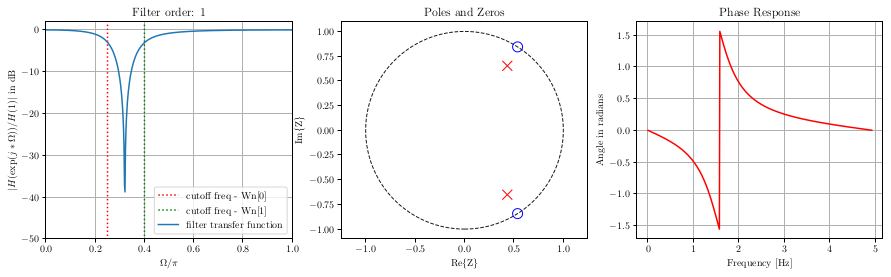

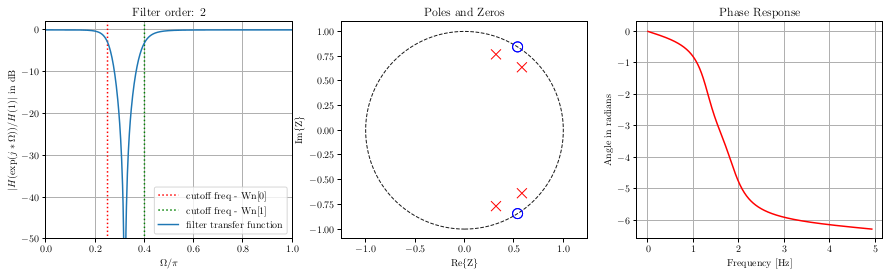

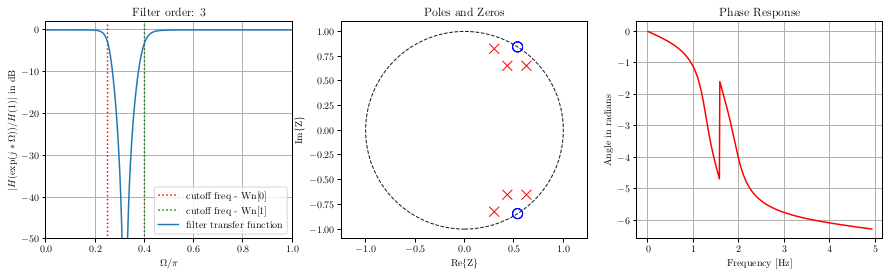

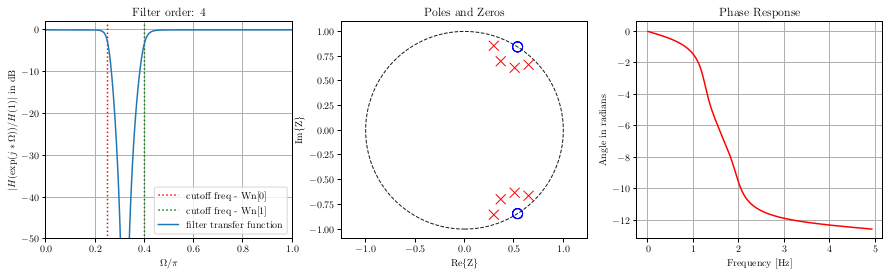

In [110]:
Wn = [0.25, 0.4]                                   #cut-off frequency limits Wn = [x,y], Wn must have 2 values.

for order in range(1,5):                           #order = 1,2,3 and 4 in a 'for' loop.
    b, a = sig.butter(order, Wn, 'bandstop')       #bandstop butterworth design
    w4, h4 = sig.freqz(b, a)                       #compute frequency response
    A = np.linspace(0.0, 1.0, len(w4))             #frequency is normalised to [0.0, 1.0] in a continuous form

    plt.figure(figsize=(15,4))                     #set the size of the figure
    plt.subplot(1,3,1)                             #1st plot of the 3 plots. (It's gonna be visualised on the left)
    x = np.abs(h4)
    plt.plot([Wn[0],Wn[0]],[-100,2],color='r',ls=':',label='cutoff freq. - Wn[0]') #red dashed line at the cut-off Wn = 0.25
    plt.plot([Wn[1],Wn[1]],[-100,2],color='g',ls=':',label='cutoff freq. - Wn[1]') #green dashed line at the cut-off Wn = 0.4
    response = 20 * np.log10(x, out = x, where = x > 0 )    #amplitude in Db is calculated(Zero collision error is avoided)
    plt.plot(A, response, label='filter transfer function') #plot frequency response
    plt.axis([0, 1, -50, 2])                                #specified axeses is set      
    
    plt.legend(loc='lower right')                 #elements of the graph are shown in the location 'lower right'
    
    plt.title("Filter order: " + str(order))       #filter order in the title  
    plt.xlabel('$\Omega/\pi$')                     #Omega/pi    
    plt.ylabel("$|H(\mathrm{exp}(j*\Omega))/H(1)|$ in dB")  #absolute value of the spectrum in dB
    plt.grid()                                     #configure the grid lines

    plt.subplot(1,3,2)                             #2nd plot of the 3 plots. (It's gonna be visualised on the middle)
    zplane(np.roots(b), np.roots(a))               #roots of the polynomial function which is b, a are sent to zplane() 
    
    plt.subplot(1,3,3)                             #3st plot of the 3 plots. (It's gonna be visualised on the right)
    angles = np.unwrap(np.angle(h4))               #angles are taken
    plt.plot(w4/2*np.pi, angles, 'r')              #angles are plotted in radians
    plt.title('Phase Response')                    #put name of the figure
    plt.ylabel('Angle in radians')                 #put name of y label
    plt.xlabel('Frequency [Hz]')                   #put name of x label
    plt.grid()                                     #configure the grid lines

<div class = "alert alert-block alert-warning">
<ol>
    <li> As the filter order $m$ increases from $1$ to $4$, the filter transfer function line gets closer to the cut-off limits and saturates.</li>
    <li> As the number of filter order $m$ increases, the number of zeros and poles also increases. Poles and zeros are placed as a pair. For filter order m = 1 there are two zeros and two poles. For filter order $m = 2$, there are four zeros and four poles. So, the number of zeros and poles is 2 times the filter order $m$.  </li>
    <li> Zeros and poles are symmetric with respect to $y = 0$ line on all z-plane figures illustrated above. </li>
</ol>
<div>

## References

1) [[SM97]](http://www.dspguide.com/pdfbook.htm) S. W. Smith, The Scientist and Engineer’s Guide to Digital Signal Processing. California Technical Publishing, San Diego, 1997.

2) https://www.geeksforgeeks.org/digital-low-pass-butterworth-filter-in-python/

3) https://github.com/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-5-Solution.ipynb